<a href="https://colab.research.google.com/github/akshat27D/ML-Projects/blob/main/CArtoonify_Image_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cartoonify Image

In [8]:
!pip install easygui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Step 1: Importing the required modules

In [9]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Building a File Box to choose a particular file

In [11]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

Step 3: How is an image stored?

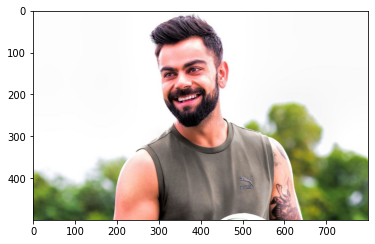

In [19]:
#read the image
originalmage = cv2.imread("/content/Samole_Image.jpg")
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
#print(image)  # image is stored in form of numbers

# confirm that image is chosen
if originalmage is None:
    print("Can not find any image. Choose appropriate file")
    sys.exit()

ReSized1 = cv2.resize(originalmage, (800, 500))
plt.imshow(ReSized1, cmap='gray')

Step 4: Transforming an image to grayscale 

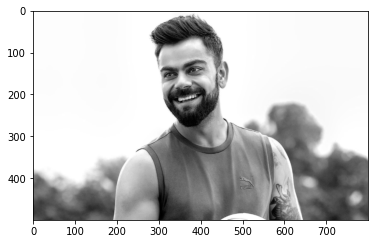

In [20]:
#converting an image to grayscale
grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
ReSized2 = cv2.resize(grayScaleImage, (800, 500))
plt.imshow(ReSized2, cmap='gray')

Step 5: Smoothening a grayscale image

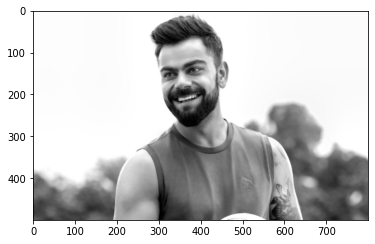

In [21]:
#applying median blur to smoothen an image
smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
ReSized3 = cv2.resize(smoothGrayScale, (800, 500))
plt.imshow(ReSized3, cmap='gray')

Step 6: Retrieving the edges of an image

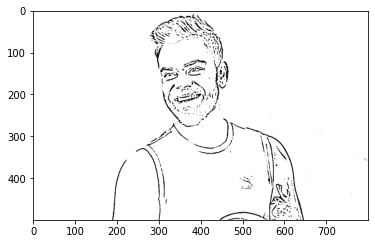

In [22]:
#retrieving the edges for cartoon effect
#by using thresholding technique
getEdge = cv2.adaptiveThreshold(smoothGrayScale, 250, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 9, 9)

ReSized4 = cv2.resize(getEdge, (800, 500))
plt.imshow(ReSized4, cmap='gray')

Step 7: Preparing a Mask Image

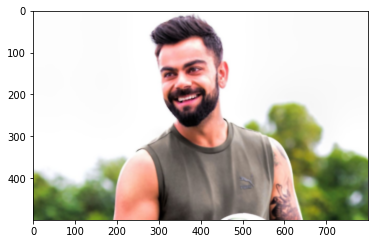

In [23]:
#applying bilateral filter to remove noise 
#and keep edge sharp as required
colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (800, 500))
plt.imshow(ReSized5, cmap='gray')

Step 8: Giving a Cartoon Effect

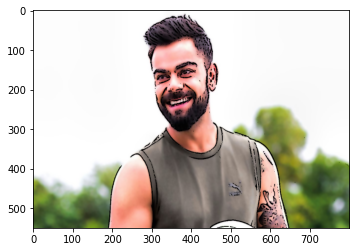

In [24]:
#masking edged image with our "BEAUTIFY" image
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

ReSized6 = cv2.resize(cartoonImage, (800, 550))
plt.imshow(ReSized6, cmap='gray')

Step 9: Plotting all the transitions together

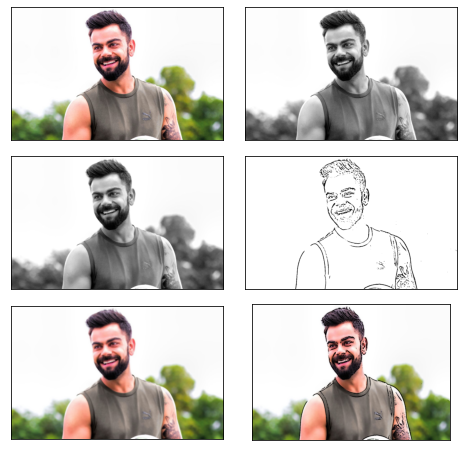

In [25]:
# Plotting the whole transition
images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
# //save button code
plt.show()